# **Beta-Lactamase Data**

In [12]:
import zipfile
import pandas as pd
from padelpy import from_smiles

zf = zipfile.ZipFile("beta_lactamase_CHEMBL29.zip", "r")
df = pd.concat( (pd.read_csv( zf.open(f) ) for f in zf.namelist() ) )

In [13]:
df.head()

,molecule_chembl_id,canonical_smiles,standard_relation,standard_value,standard_units,standard_type,pchembl_value,target_pref_name,bao_label
0,CHEMBL1730,CO/N=C(\C(=O)N[C@@H]1C(=O)N2C(C(=O)O)=C(COC(C)...,=,10.0,/mM/s,Kcat/Km,NaN,Gil1,assay format
1,CHEMBL996,CO[C@@]1(NC(=O)Cc2cccs2)C(=O)N2C(C(=O)O)=C(COC...,NaN,NaN,NaN,Kcat/Km,NaN,Gil1,assay format
2,CHEMBL617,CC(=O)OCC1=C(C(=O)O)N2C(=O)[C@@H](NC(=O)Cc3ccc...,=,598.0,/mM/s,Kcat/Km,NaN,Gil1,assay format
3,CHEMBL702,CCN1CCN(C(=O)N[C@@H](C(=O)N[C@@H]2C(=O)N3[C@@H...,=,3400.0,/mM/s,Kcat/Km,NaN,Gil1,assay format
4,CHEMBL1449,CC1(C)S[C@@H]2[C@H](NC(=O)[C@H](C(=O)O)c3ccsc3...,=,10000.0,/mM/s,Kcat/Km,NaN,Gil1,assay format


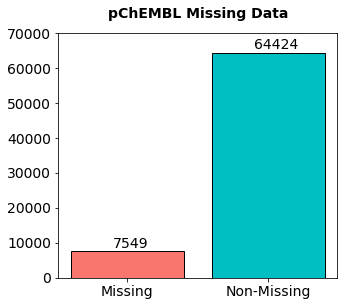

In [14]:
# Bar plot of Missing vs Non-Missing Data

import matplotlib.pyplot as plt

# Data
missing = df.pchembl_value.isnull().sum()
nonmissing = df.pchembl_value.notnull().sum()

x = ['Missing', 'Non-Missing']
y = [missing, nonmissing]

# Setup plot
fig, ax = plt.subplots()

# Make bar plot
p = ax.bar(x, y, color = ['#F8766D', '#00BFC4'], ec = 'black')

ax.set_title('pChEMBL Missing Data', fontsize=14, fontweight='bold', pad=15)
#ax.set_xticklabels(x, fontweight='bold')

ax.set_ylim(0,70000)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)

# Label above bar
for index, data in enumerate(y):
    plt.text(x=index-0.1 , y =data+1000 , s=f"{data}" , fontdict=dict(fontsize=14))

fig.set_size_inches(5,4.5)
plt.show()

In [15]:
print('Number of unique ChEMBL ID:', str(len(df.molecule_chembl_id.unique()) )  )
print('Total number of ChEMBL ID: ', str(len(df)) )
print('Number of missing ChEMBL ID: ', str(df.molecule_chembl_id.isnull().sum()) )

Number of unique ChEMBL ID: 64436
Total number of ChEMBL ID:  71973
Number of missing ChEMBL ID:  0


In [16]:
# Non-missing data with pChEMBL value
print(df.shape)
df2 = df[df.pchembl_value.notnull()]
print(df2.shape)
df2.head()

(71973, 9)
(64424, 9)


,molecule_chembl_id,canonical_smiles,standard_relation,standard_value,standard_units,standard_type,pchembl_value,target_pref_name,bao_label
47,CHEMBL777,O=C(O)[C@H]1/C(=C/CO)O[C@@H]2CC(=O)N21,=,9.0,nM,IC50,8.05,Gil1,assay format
48,CHEMBL404,C[C@]1(Cn2ccnn2)[C@H](C(=O)O)N2C(=O)C[C@H]2S1(...,=,40.0,nM,IC50,7.40,Gil1,assay format
7,CHEMBL777,O=C(O)[C@H]1/C(=C/CO)O[C@@H]2CC(=O)N21,=,70.0,nM,IC50,7.16,Beta-lactamase SCO-1,single protein format
8,CHEMBL403,CC1(C)[C@H](C(=O)O)N2C(=O)C[C@H]2S1(=O)=O,=,6200.0,nM,IC50,5.21,Beta-lactamase SCO-1,single protein format
9,CHEMBL404,C[C@]1(Cn2ccnn2)[C@H](C(=O)O)N2C(=O)C[C@H]2S1(...,=,10.0,nM,IC50,8.00,Beta-lactamase SCO-1,single protein format


In [17]:
import matplotlib.pyplot as plt

unique = len(df.molecule_chembl_id.unique())
not_unique = len(df) - unique

x = ['Unique', 'Redundant']
y = [unique, not_unique]



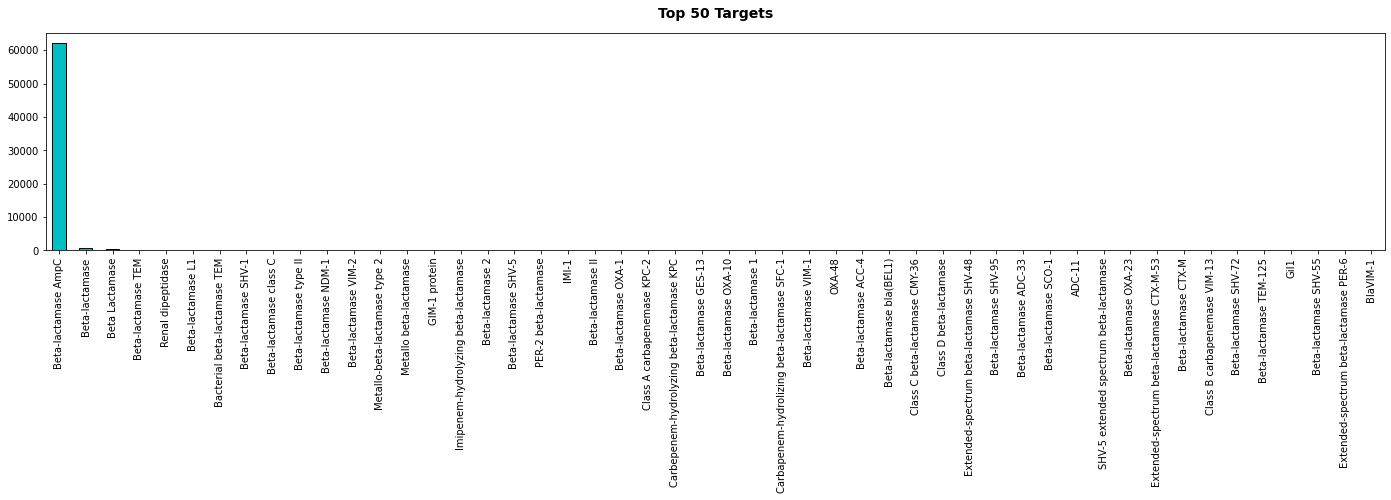

In [18]:
df2.target_pref_name.value_counts()[0:50].plot.bar(figsize=(24,4), color='#00BFC4', ec='black')

plt.title('Top 50 Targets', fontsize=14, fontweight='black', pad=15)
plt.show()

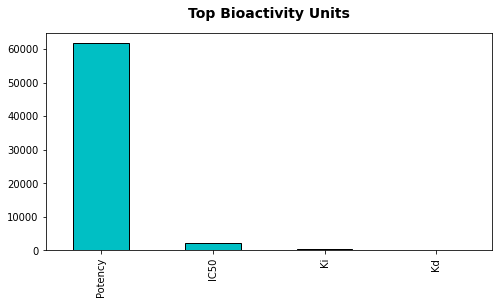

In [19]:
# Top 10 Bioactivity units
df2.standard_type.value_counts()[:10].plot.bar(figsize=(8,4), color='#00BFC4', ec='black')

plt.title('Top Bioactivity Units', fontsize=14, fontweight='black', pad=15)
plt.show()

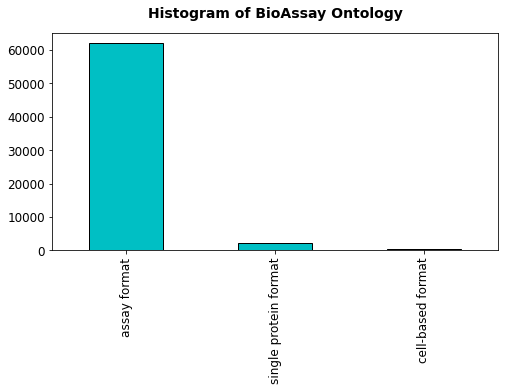

In [20]:
bao_labels = df2.bao_label.value_counts()
bao_labels.plot.bar(figsize=(8,4), color='#00BFC4', ec='black')

plt.title('Histogram of BioAssay Ontology', fontsize=14, fontweight='black', pad=15)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.show()

In [21]:
bao_labels

assay format             62068
single protein format     2047
cell-based format          309
Name: bao_label, dtype: int64

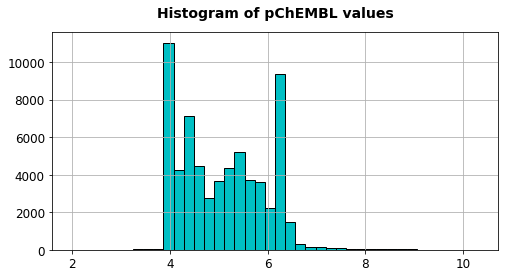

In [22]:
df2.pchembl_value.hist(bins=40, figsize=(8,4), color='#00BFC4', ec='black')

plt.title('Histogram of pChEMBL values', fontsize=14, fontweight='black', pad=15)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.show()

pChEMBL values <5 == 'Inactive'
pChEMBL values > 6 == 'Active'
pChEMBL values 5-6 == 'Intermediate'

In [23]:
df2_mean = df2.groupby('molecule_chembl_id').mean()

In [24]:
df2_std = df2.groupby('molecule_chembl_id').std()
df_std_filter = df2_std[(df2_std.pchembl_value < 2) | (df2_std.pchembl_value.isnull())]
print(df2_std.shape)
print(df_std_filter.shape)
print(df2_std.head())
print(df2_std[(df2_std.pchembl_value > 2)].shape)
print(df2_std[(df2_std.pchembl_value > 2)])

(63038, 2)
(63030, 2)
                    standard_value  pchembl_value
molecule_chembl_id                               
CHEMBL1018                     NaN            NaN
CHEMBL1024                     NaN            NaN
CHEMBL1028                     NaN            NaN
CHEMBL1036                     NaN            NaN
CHEMBL104             10606.601718       0.169706
(8, 2)
                    standard_value  pchembl_value
molecule_chembl_id                               
CHEMBL166730          64389.850602       2.382950
CHEMBL1795572         17890.931511       2.041429
CHEMBL3234727         50133.870786       2.015254
CHEMBL338933          45711.707563       2.020726
CHEMBL4114669         15575.928775       2.232136
CHEMBL4114749          2605.293120       2.141316
CHEMBL4533632          3604.123264       2.283955
CHEMBL67925            7068.239385       2.404163


In [25]:
df_merge1 = df_std_filter.merge(df2_mean, on='molecule_chembl_id')
print(df_merge1.shape)
df_merge1.head()

(63030, 4)


,standard_value_x,pchembl_value_x,standard_value_y,pchembl_value_y
molecule_chembl_id,,,,
CHEMBL1018,NaN,NaN,316.2,6.50
CHEMBL1024,NaN,NaN,11220.2,4.95
CHEMBL1028,NaN,NaN,2818.4,5.55
CHEMBL1036,NaN,NaN,39.8,7.40
CHEMBL104,10606.601718,0.169706,27500.0,4.58


In [26]:
df2.drop_duplicates(subset=['molecule_chembl_id'], keep='first', inplace=True)
print(df2.shape)
df_merge2 = df_merge1.merge(df2, how='left', on='molecule_chembl_id')
print(df_merge2.shape)
df_merge2.head()

(63038, 9)
(63030, 13)


C:\Users\trent\anaconda3\envs\beta_lactamase\lib\site-packages\pandas\util\_decorators.py:311: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return func(*args, **kwargs)


,molecule_chembl_id,standard_value_x,pchembl_value_x,standard_value_y,pchembl_value_y,canonical_smiles,standard_relation,standard_value,standard_units,standard_type,pchembl_value,target_pref_name,bao_label
0,CHEMBL1018,NaN,NaN,316.2,6.50,C/C=C(C(=C/C)/c1ccc(O)cc1)\c1ccc(O)cc1,=,316.2,nM,Potency,6.50,Beta-lactamase AmpC,assay format
1,CHEMBL1024,NaN,NaN,11220.2,4.95,O=P1(NCCCl)OCCCN1CCCl,=,11220.2,nM,Potency,4.95,Beta-lactamase AmpC,assay format
2,CHEMBL1028,NaN,NaN,2818.4,5.55,CCNCC(=O)Nc1c(C)cccc1C,=,2818.4,nM,Potency,5.55,Beta-lactamase AmpC,assay format
3,CHEMBL1036,NaN,NaN,39.8,7.40,OC(CCCN1CCC(O)(c2ccc(Cl)cc2)CC1)c1ccc(F)cc1,=,39.8,nM,Potency,7.40,Beta-lactamase AmpC,assay format
4,CHEMBL104,10606.601718,0.169706,27500.0,4.58,Clc1ccccc1C(c1ccccc1)(c1ccccc1)n1ccnc1,=,20000.0,nM,IC50,4.70,Beta-lactamase AmpC,single protein format


In [27]:
df_merge2.pchembl_value = df_merge2.pchembl_value_y
df_merge2.head()

,molecule_chembl_id,standard_value_x,pchembl_value_x,standard_value_y,pchembl_value_y,canonical_smiles,standard_relation,standard_value,standard_units,standard_type,pchembl_value,target_pref_name,bao_label
0,CHEMBL1018,NaN,NaN,316.2,6.50,C/C=C(C(=C/C)/c1ccc(O)cc1)\c1ccc(O)cc1,=,316.2,nM,Potency,6.50,Beta-lactamase AmpC,assay format
1,CHEMBL1024,NaN,NaN,11220.2,4.95,O=P1(NCCCl)OCCCN1CCCl,=,11220.2,nM,Potency,4.95,Beta-lactamase AmpC,assay format
2,CHEMBL1028,NaN,NaN,2818.4,5.55,CCNCC(=O)Nc1c(C)cccc1C,=,2818.4,nM,Potency,5.55,Beta-lactamase AmpC,assay format
3,CHEMBL1036,NaN,NaN,39.8,7.40,OC(CCCN1CCC(O)(c2ccc(Cl)cc2)CC1)c1ccc(F)cc1,=,39.8,nM,Potency,7.40,Beta-lactamase AmpC,assay format
4,CHEMBL104,10606.601718,0.169706,27500.0,4.58,Clc1ccccc1C(c1ccccc1)(c1ccccc1)n1ccnc1,=,20000.0,nM,IC50,4.58,Beta-lactamase AmpC,single protein format


In [28]:
df_merge_final = df_merge2.drop(['standard_value_x', 'pchembl_value_x', 'standard_value_y', 'pchembl_value_y'], axis=1)
print(df_merge_final.shape)
df_merge_final.head()

(63030, 9)


,molecule_chembl_id,canonical_smiles,standard_relation,standard_value,standard_units,standard_type,pchembl_value,target_pref_name,bao_label
0,CHEMBL1018,C/C=C(C(=C/C)/c1ccc(O)cc1)\c1ccc(O)cc1,=,316.2,nM,Potency,6.50,Beta-lactamase AmpC,assay format
1,CHEMBL1024,O=P1(NCCCl)OCCCN1CCCl,=,11220.2,nM,Potency,4.95,Beta-lactamase AmpC,assay format
2,CHEMBL1028,CCNCC(=O)Nc1c(C)cccc1C,=,2818.4,nM,Potency,5.55,Beta-lactamase AmpC,assay format
3,CHEMBL1036,OC(CCCN1CCC(O)(c2ccc(Cl)cc2)CC1)c1ccc(F)cc1,=,39.8,nM,Potency,7.40,Beta-lactamase AmpC,assay format
4,CHEMBL104,Clc1ccccc1C(c1ccccc1)(c1ccccc1)n1ccnc1,=,20000.0,nM,IC50,4.58,Beta-lactamase AmpC,single protein format


In [34]:
nrow = 25

descriptors = pd.DataFrame(from_smiles(df_merge_final['canonical_smiles'][0:nrow].astype(str).to_list()))
#pd.DataFrame(from_smiles(["O=C(O)[C@H]1/C(=C/CO)O[C@@H]2CC(=O)N21"]))
descriptors['molecule_chembl_id'] = df_merge_final['molecule_chembl_id'][0:nrow]
descriptors['pchembl_value'] = df_merge_final['pchembl_value'][0:nrow]


In [36]:
descriptors.columns

Index(['nAcid', 'ALogP', 'ALogp2', 'AMR', 'apol', 'naAromAtom', 'nAromBond',
       'nAtom', 'nHeavyAtom', 'nH',
       ...
       'E1s', 'E2s', 'E3s', 'Ts', 'As', 'Vs', 'Ks', 'Ds', 'molecule_chembl_id',
       'pchembl_value'],
      dtype='object', length=1877)